# Data play

This is a simple example on how to use (_still largely incomplete!_) GRANDlib classes for analysis-oriented data readout.

First, let's generate a ROOT file with random, dummy events. The old file will be cleared if exists. This uses an example script examples/io/DataStoringExample.py. Please be sure to restart kernel each time you try this script.


In [1]:
import os.path

if os.path.isfile("dummy_data.root"):
    os.remove("dummy_data.root")
%run ../dataio/data_storing.py dummy_data.root

5 traces for event 0
4 traces for event 1
5 traces for event 2
4 traces for event 3
5 traces for event 4
6 traces for event 5
6 traces for event 6
3 traces for event 7
4 traces for event 8
4 traces for event 9
Wrote trun
Wrote tadccounts
Wrote trawvoltage
Wrote tvoltage
Wrote tefield
Wrote tshower
Finished writing file dummy_data.root


Now we import the necessary python modules

In [2]:
import sys
import os
from grand.grandlib_classes.grandlib_classes import *

Let's create an Event, and provide the file name, run and event numbers (which we know to exist) for it

In [3]:
e = Event()
e.file = "dummy_data.root"
e.run_number = 0
e.event_number = 0

The Event has to be told to initialise its contents from the provided file, with provided run and event numbers

In [4]:
e.fill_event_from_trees()

Run information loaded.
Voltage information loaded.
Efield information loaded.
Shower information loaded.


Let's print a Run property (constant for the whole run) - the data source. The default value is "other". So if it prints out different, we know that it has been initailised from TTrees:

In [5]:
print(e.data_source)

dummy


How many traces do we have in this event?

In [6]:
print(len(e.voltages))

5


What are the contents of the first trace X?

In [11]:
print(e.voltages[0].trace.x)

[ 0.00054932  0.00164795  0.00175781  0.00186768  0.00131836 -0.00142822
 -0.00087891  0.00065918  0.00186768  0.00197754  0.00076904 -0.00098877
  0.         -0.00054932  0.00054932  0.0012085   0.00131836  0.00219727
  0.00197754 -0.00032959  0.00219727 -0.0020874  -0.00219727 -0.00054932
  0.00109863 -0.00021973 -0.00032959 -0.00164795  0.00142822 -0.00219727
 -0.00109863 -0.00043945 -0.00175781 -0.00021973  0.00164795  0.00131836
 -0.00197754  0.00109863  0.0020874   0.0012085   0.00032959 -0.00142822
  0.00043945  0.00054932  0.00010986  0.00021973  0.00186768  0.00098877
 -0.00054932 -0.00032959 -0.00197754  0.00109863  0.00054932  0.00065918
  0.00197754  0.00087891  0.00153809 -0.00098877  0.00010986 -0.00164795
 -0.0020874   0.00197754 -0.00131836  0.00164795  0.00142822 -0.00197754
 -0.00043945  0.00109863  0.00032959  0.00153809 -0.00054932  0.0012085
 -0.00186768 -0.00021973 -0.00054932  0.00175781  0.0020874  -0.00175781
 -0.00219727 -0.00219727  0.00186768 -0.00142822 -0.

Let's draw similar Efield trace with ROOT:

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


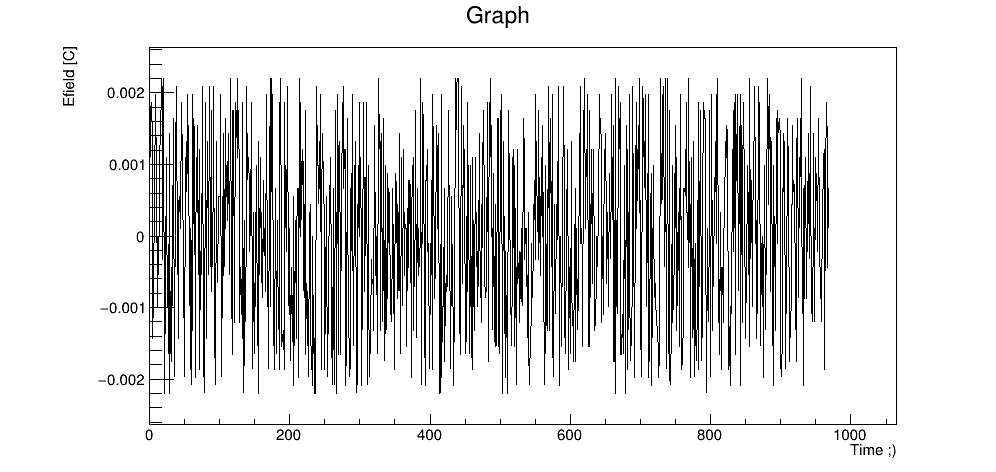

In [12]:
import ROOT
c = ROOT.TCanvas("c", "c", 1000, 500)
c.SetLeftMargin(0.15)
trace_len = len(e.efields[0].trace.x)
g = ROOT.TGraph(trace_len, np.arange(trace_len).astype(np.float64), np.array(e.voltages[0].trace.x).astype(np.float64))
g.GetXaxis().SetTitle("Time ;)")
g.GetYaxis().SetTitle("Efield [C]")
g.Draw("AL")
c.Draw()